# Convolutional Neural Networks with Keras and TensorFlow

## Part 1. Load the Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [3]:
# Map numeric labels to label names for better readability
train_labels_named = [label_names[label] for label in train_labels]
test_labels_named = [label_names[label] for label in test_labels]

In [4]:
# Display shape of train and test arrays
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [5]:
# Display maximum and minimum values before scaling
print("Max pixel value:", train_images.max())
print("Min pixel value:", train_images.min())

Max pixel value: 255
Min pixel value: 0


In [6]:
# Scale images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

# Display max and min values after scaling
print("Max pixel value after scaling:", train_images.max())
print("Min pixel value after scaling:", train_images.min())

Max pixel value after scaling: 1.0
Min pixel value after scaling: 0.0


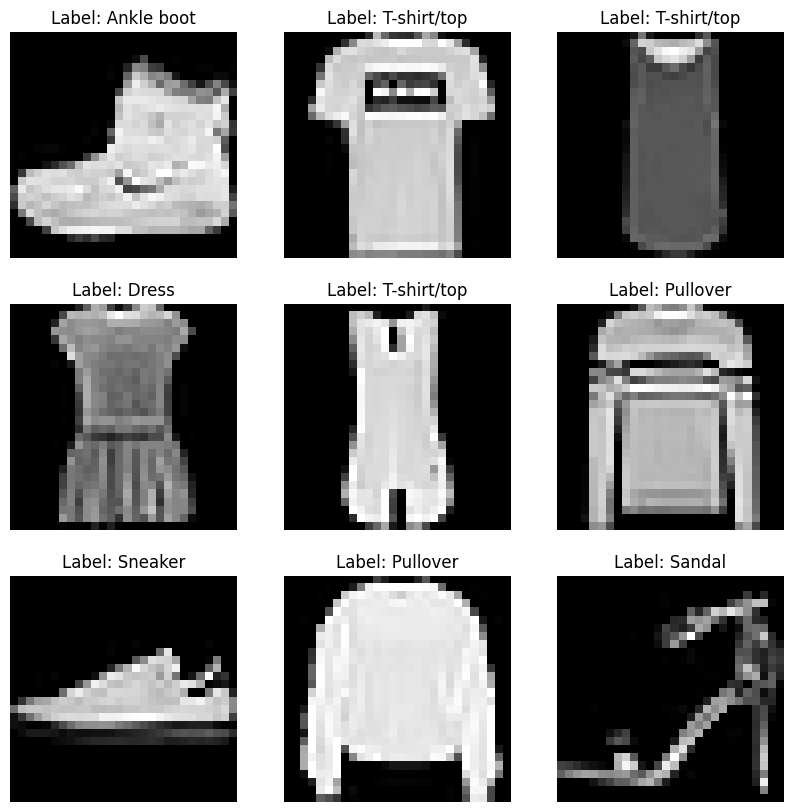

In [7]:
# Display several images and their labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels_named[i]}")
    plt.axis('off')
plt.show()

## Part 2. Model Definition and Training

In [8]:
# Define model `fmnist_1`
fmnist_1 = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
# Display model summary
fmnist_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,755,210 (6.70 MB)

 Trainable params: 1,755,210 (6.70 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Reshape images to (28, 28, 1)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [11]:
print("Reshaped train images shape:", train_images.shape)
print("Reshaped test images shape:", test_images.shape)

Reshaped train images shape: (60000, 28, 28, 1)
Reshaped test images shape: (10000, 28, 28, 1)


In [12]:
# Compile and train the model
fmnist_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fmnist_1.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.8072 - loss: 0.5638
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9087 - loss: 0.2487
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9323 - loss: 0.1872
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9454 - loss: 0.1494
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9574 - loss: 0.1162
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9689 - loss: 0.0877
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9765 - loss: 0.0654
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9845 - loss: 0.0447
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9872 - loss: 0.0361
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9907 - loss: 0.0275


In [13]:
# Evaluate on the test dataset
test_loss, test_acc = fmnist_1.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9195 - loss: 0.3869
Test accuracy: 0.9200999736785889


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


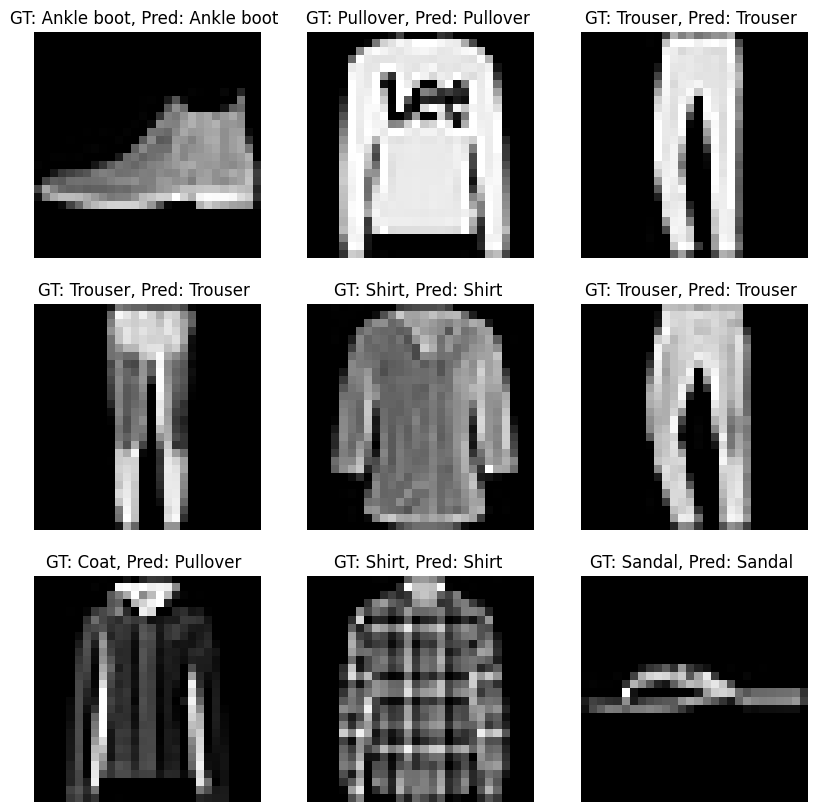

In [14]:
# Display predictions with ground-truth labels
predictions = fmnist_1.predict(test_images[:9])
predictions_labels_named = [label_names[np.argmax(label)] for label in predictions]
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"GT: {test_labels_named[i]}, Pred: {predictions_labels_named[i]} ")
    plt.axis('off')
plt.show()

## Part 3. Define a Larger Model and Use Validation Split

In [15]:
# Define model `fmnist_2`
fmnist_2 = models.Sequential([
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
# Compile and train the model with 25% validation split
fmnist_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fmnist_2.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.25)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.6853 - loss: 0.8463 - val_accuracy: 0.8773 - val_loss: 0.3383
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8858 - loss: 0.3101 - val_accuracy: 0.8983 - val_loss: 0.2741
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9095 - loss: 0.2500 - val_accuracy: 0.9095 - val_loss: 0.2438
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9233 - loss: 0.2117 - val_accuracy: 0.9187 - val_loss: 0.2209
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9333 - loss: 0.1816 - val_accuracy: 0.9261 - val_loss: 0.2110
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9436 - loss: 0.1535 - val_accuracy: 0.9214 - val_loss: 0.2184
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9494 - loss: 0.1363 - val_accuracy: 0.9191 - val_loss: 0.2311
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9573 - loss: 0.1142 - va

In [17]:
# Evaluate on the test dataset
test_loss, test_acc = fmnist_2.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9157 - loss: 0.2794
Test accuracy: 0.9175000190734863


## Part 4. Apply Dropout, Early Stopping

In [18]:
# Define model `fmnist_3` with dropout layers
fmnist_3 = models.Sequential([
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [19]:
# Compile model and apply early stopping
fmnist_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

import time
start_time = time.time()
history = fmnist_3.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.25, callbacks=[early_stopping])
end_time = time.time()
print("Training time:", end_time - start_time, "seconds")

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6313 - loss: 0.9948 - val_accuracy: 0.8608 - val_loss: 0.3782
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8552 - loss: 0.3944 - val_accuracy: 0.8815 - val_loss: 0.3141
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8786 - loss: 0.3322 - val_accuracy: 0.9040 - val_loss: 0.2670
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8937 - loss: 0.2896 - val_accuracy: 0.9127 - val_loss: 0.2415
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9097 - loss: 0.2591 - val_accuracy: 0.9131 - val_loss: 0.2368
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9106 - loss: 0.2439 - val_accuracy: 0.9192 - val_loss: 0.2180
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9156 - loss: 0.2249 - val_accuracy: 0.9155 - val_loss: 0.2243
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9201 - loss: 0.2185 - val_acc

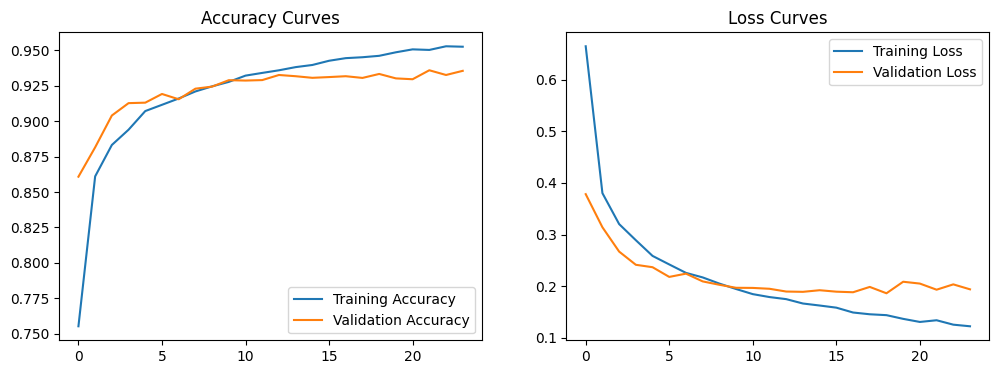

In [20]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

In [21]:
# Evaluate on the test dataset
test_loss, test_acc = fmnist_3.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9237 - loss: 0.2131
Test accuracy: 0.9265000224113464


## Part 5. Batch Normalization, and Data Augmentation

In [22]:
# Define model `fmnist_4` with batch normalization
fmnist_4 = models.Sequential([
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [23]:
# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split the training data: 80% for training, 20% for validation
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Display the shapes of the split datasets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation images shape:", validation_images.shape)
print("Validation labels shape:", validation_labels.shape)

# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_labels, 10)
validation_labels = to_categorical(validation_labels, 10)

print("Training labels (one-hot) shape:", train_labels.shape)
print("Validation labels (one-hot) shape:", validation_labels.shape)


Training images shape: (48000, 28, 28, 1)
Training labels shape: (48000,)
Validation images shape: (12000, 28, 28, 1)
Validation labels shape: (12000,)
Training labels (one-hot) shape: (48000, 10)
Validation labels (one-hot) shape: (12000, 10)


In [25]:
# Compile and train model with early stopping
fmnist_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train with data augmentation and explicit validation data
train_data = datagen.flow(train_images, train_labels, batch_size=128)
start_time = time.time()
history = fmnist_4.fit(train_data, epochs=50, validation_data=(validation_images, validation_labels),
                       callbacks=[early_stopping])
end_time = time.time()

print("Training time with data augmentation:", end_time - start_time, "seconds")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.6980 - loss: 0.8383 - val_accuracy: 0.2241 - val_loss: 3.8800
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - accuracy: 0.8334 - loss: 0.4498 - val_accuracy: 0.8572 - val_loss: 0.3729
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.8643 - loss: 0.3659 - val_accuracy: 0.8730 - val_loss: 0.3314
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.8693 - loss: 0.3494 - val_accuracy: 0.8802 - val_loss: 0.3188
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8843 - loss: 0.3146 - val_accuracy: 0.8715 - val_loss: 0.3563
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.8892 - loss: 0.2975 - val_accuracy: 0.9030 - val_loss: 0.2556
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.8933 - loss: 0.2863 - val_accuracy: 0.8677 - val_loss: 0.3508
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.8985 - loss: 0.2726 - val_accurac

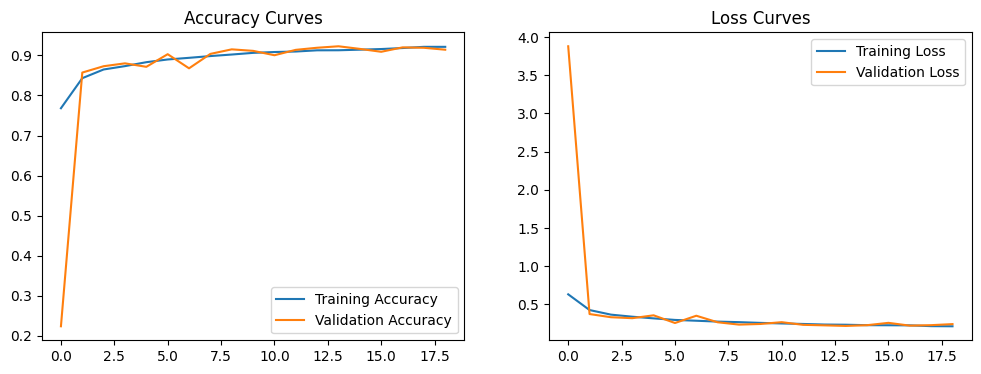

In [26]:
# Your Code Here
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()



In [27]:
# Convert test labels to categorical (one-hot encoding)
test_labels = to_categorical(test_labels, 10)

# evaluate on the test dataset
test_loss, test_acc = fmnist_4.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9196 - loss: 0.2280
Test accuracy: 0.9180999994277954


Training fmnist_5...
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.5658 - loss: 1.1427 - val_accuracy: 0.8139 - val_loss: 0.4797
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.7789 - loss: 0.5802 - val_accuracy: 0.8508 - val_loss: 0.3936
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.8213 - loss: 0.4763 - val_accuracy: 0.8541 - val_loss: 0.3806
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.8407 - loss: 0.4288 - val_accuracy: 0.8827 - val_loss: 0.3243
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.8545 - loss: 0.3951 - val_accuracy: 0.8831 - val_loss: 0.3104
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.8596 - loss: 0.3872 - val_accuracy: 0.8937 - val_loss: 0.2865
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.8658 - loss: 0.3594 - val_accuracy: 0.8923 - val_loss: 0.2863
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.8

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.5913 - loss: 1.0945 - val_accuracy: 0.7885 - val_loss: 0.5377
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.7889 - loss: 0.5470 - val_accuracy: 0.8397 - val_loss: 0.4333
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 51ms/step - accuracy: 0.8319 - loss: 0.4446 - val_accuracy: 0.8436 - val_loss: 0.4173
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.8542 - loss: 0.3868 - val_accuracy: 0.8823 - val_loss: 0.3157
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8661 - loss: 0.3552 - val_accuracy: 0.8862 - val_loss: 0.3091
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.8791 - loss: 0.3229 - val_accuracy: 0.8856 - val_loss: 0.3075
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8843 - loss: 0.3105 - val_accuracy: 0.9044 - val_loss: 0.2595
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.8945 - loss: 0.2884 - val_accurac

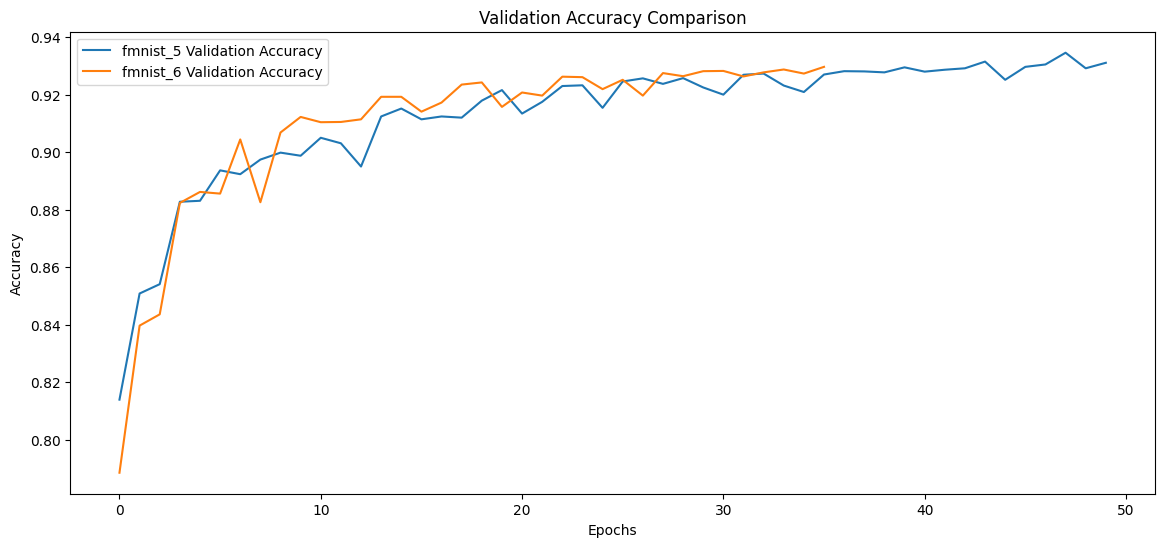

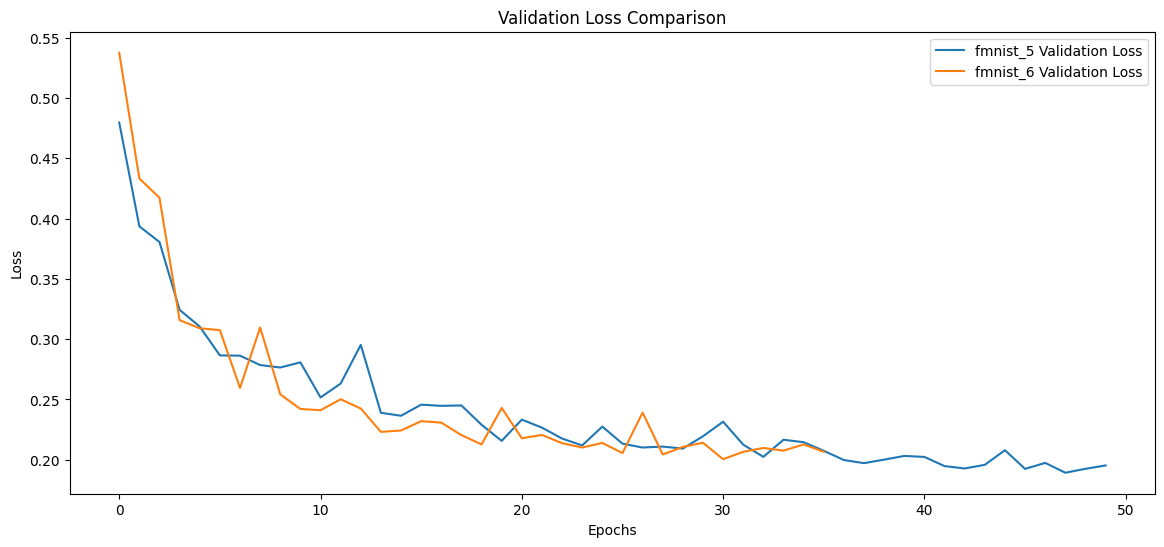

In [28]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Define additional models
def create_model_5():
    return models.Sequential([
        layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),
        layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

def create_model_6():
    return models.Sequential([
        layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

# Create more models as needed
model_functions = [create_model_5, create_model_6]

# Train and evaluate each model
results = []
history_data = []
for idx, model_fn in enumerate(model_functions, start=5):
    print(f"Training fmnist_{idx}...")
    model = model_fn()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    train_data = datagen.flow(train_images, train_labels, batch_size=128)

    history = model.fit(train_data, epochs=50, validation_data=(validation_images, validation_labels),
                        callbacks=[early_stopping], verbose=1)
    history_data.append(history.history)

    # Evaluate
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    predictions = model.predict(test_images)
    predictions_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(test_labels, axis=1)

    metrics = classification_report(true_labels, predictions_labels, output_dict=True)
    accuracy = metrics['accuracy']
    precision = np.mean([v['precision'] for k, v in metrics.items() if k.isdigit()])
    recall = np.mean([v['recall'] for k, v in metrics.items() if k.isdigit()])
    f1_score = np.mean([v['f1-score'] for k, v in metrics.items() if k.isdigit()])

    results.append({
        'Model': f'fmnist_{idx}',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Test Loss': test_loss
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the metrics in tabular form
print(results_df)

# Plot comparison graphs
plt.figure(figsize=(14, 6))
plt.plot(history_data[0]['val_accuracy'], label='fmnist_5 Validation Accuracy')
plt.plot(history_data[1]['val_accuracy'], label='fmnist_6 Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(history_data[0]['val_loss'], label='fmnist_5 Validation Loss')
plt.plot(history_data[1]['val_loss'], label='fmnist_6 Validation Loss')
plt.legend()
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()